In [ ]:
# L3_9
l3, l6, x = sympy.symbols('L3 L6 x')
sympy.solve((1+0.5*l6) - (1+0.25*l3)*(1+0.25*x), x)

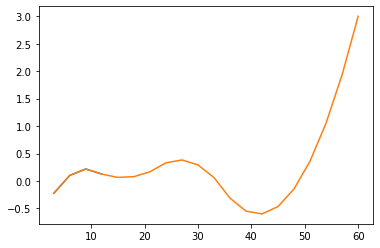

In [ ]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.optimize
import sympy

L3 = -0.2233
L6 = -0.0633
L9 = 0.1000
L12 = 0.3000

S1 = 0.167
S2 = 0.785
S3 = 1.063
S5 = 1.242

L3_6 = 4.0*(-L3 + 2.0*L6)/(L3 + 4.0)

def DCounter(i, L):
    if i == 0:
        D = 1/(1+0.25*L[i])
    else:
        c = DCounter(i-1, L)
        k = (i+1)%4
        if (i+1)%4 == 0:
            k = 4
        D = c/(1+0.25*k*L[i])
    return D
    
def firstYear(L3, L3_6, x):
    f = scipy.interpolate.interp1d([3, 6, 12],[L3, L3_6, x], 'quadratic')
    L6_9 = f(9)
    D3 = 1/(1+0.25*L3)
    D6 = D3/(1+0.5*L3_6)
    D9 = D6/(1+0.75*L6_9)
    D12 = D9/(1+x)
    return D12

D12 = 1/(1+L12)
L9_12 = scipy.optimize.broyden1(lambda x: firstYear(L3, L3_6, x) - D12, 1.0, f_tol = 1e-6)

f = scipy.interpolate.interp1d([3,6,12],[L3, L3_6, L9_12], 'quadratic')
tenors1Y = [3, 6, 9, 12]
curve1Y = f(tenors1Y)
plt.plot(tenors1Y, curve1Y)

def secondYear(x, S2, L):
    D12 = DCounter(3, L)
    f = scipy.interpolate.interp1d([3, 6, 9, 12, 24], np.append(L, x), 'quadratic')
    
    D15 = D12/(1+0.25*f(15))
    D18 = D15/(1+0.5*f(18))
    D21 = D18/(1+0.75*f(21))
    D24 = D21/(1+x)
    
    return 0.25*S2*(D15 + D18 + D21 + D24) - 1 + D24 

 
L24 = scipy.optimize.broyden1(lambda x: secondYear(x, S2, curve1Y), 1.0, f_tol = 1e-6)
f = scipy.interpolate.interp1d([3, 6, 9, 12, 24], np.append(curve1Y, L24), 'quadratic')
tenors2Y = [3, 6, 9, 12, 15, 18, 21, 24]
curve2Y = f(tenors2Y)

def thirdYear(x, S3, L):
    D24 = DCounter(7, L)
    f = scipy.interpolate.interp1d([3, 6, 9, 12, 15, 18, 21, 24, 36], np.append(L, x), 'quadratic')
    
    D27 = D24/(1+0.25*f(27))
    D30 = D27/(1+0.5*f(30))
    D33 = D30/(1+0.75*f(33))
    D36 = D33/(1+x)
    return 0.25*S3*(D27 + D30 + D33 + D36) - 1 + D36

L36 = scipy.optimize.broyden1(lambda x: thirdYear(x, S3, curve2Y), 0.5, f_tol = 1e-6)
f = scipy.interpolate.interp1d([3, 6, 9, 12, 15, 18, 21, 24, 36], np.append(curve2Y, L36), 'quadratic')
tenors3Y = [i for i in range(3, 39, 3)] # до 36
curve3Y = f(tenors3Y)

def fifthYear(x, S5, L):
    D36 = DCounter(11, L)
    index = [i for i in range(3, 39, 3)] # до 36
    f = scipy.interpolate.interp1d(np.append(index, 60), np.append(L, x), 'quadratic')
    
    D39 = D36/(1+0.25*f(39))
    D42 = D39/(1+0.5*f(42))
    D45 = D42/(1+0.75*f(45))
    D48 = D45/(1+f(48))
    
    D51 = D48/(1+0.25*f(51))
    D54 = D51/(1+0.5*f(54))
    D57 = D54/(1+0.75*f(57))
    D60 = D57/(1+x)
    
    return 0.25*S5*(D51 + D54 + D57 + D60) - 1 + D60

index = [i for i in range(3, 39, 3)] # до 36
L60 = scipy.optimize.broyden1(lambda x: fifthYear(x, S5, curve3Y), 1.0, f_tol = 1e-6)
f = scipy.interpolate.interp1d(np.append(index, 60), np.append(curve3Y, L60), 'quadratic')
tenors5Y = [i for i in range(3, 63, 3)] # до 60
curve5Y = f(tenors5Y)
plt.plot(tenors5Y, curve5Y)